In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
dataDF=pd.read_csv('OBS_계절관측_가을.csv',header=[0,1],encoding='euc-kr')

In [5]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   (지점, Unnamed: 0_level_1)  1041 non-null   object
 1   (년도, Unnamed: 1_level_1)  1041 non-null   int64 
 2   (코스모스, 발아)                1041 non-null   object
 3   (코스모스, 발아(평비))            1041 non-null   object
 4   (코스모스, 개화)                1041 non-null   object
 5   (코스모스, 개화(평비))            1041 non-null   object
 6   (코스모스, 만발)                1041 non-null   object
 7   (코스모스, 만발(평비))            1041 non-null   object
 8   (은행나무, 단풍시작)              1041 non-null   object
 9   (은행나무, 단풍시작(평비))          1041 non-null   object
 10  (은행나무, 단풍절정)              1041 non-null   object
 11  (은행나무, 단풍절정(평비))          1041 non-null   object
 12  (은행나무, 단풍끝)               1041 non-null   object
 13  (은행나무, 단풍끝(평비))           1041 non-null   object
 14  (은행나무, 낙옆시작)            

In [6]:
dataDF.columns

MultiIndex([(    '지점', 'Unnamed: 0_level_1'),
            (    '년도', 'Unnamed: 1_level_1'),
            (  '코스모스',                 '발아'),
            (  '코스모스',             '발아(평비)'),
            (  '코스모스',                 '개화'),
            (  '코스모스',             '개화(평비)'),
            (  '코스모스',                 '만발'),
            (  '코스모스',             '만발(평비)'),
            (  '은행나무',               '단풍시작'),
            (  '은행나무',           '단풍시작(평비)'),
            (  '은행나무',               '단풍절정'),
            (  '은행나무',           '단풍절정(평비)'),
            (  '은행나무',                '단풍끝'),
            (  '은행나무',            '단풍끝(평비)'),
            (  '은행나무',               '낙옆시작'),
            (  '은행나무',           '낙옆시작(평비)'),
            (  '은행나무',                '낙옆끝'),
            (  '은행나무',            '낙옆끝(평비)'),
            (  '단풍나무',               '단풍시작'),
            (  '단풍나무',           '단풍시작(평비)'),
            (  '단풍나무',               '단풍절정'),
            (  '단풍나무',           '

In [7]:
# 각각 데이터 분리
Year_index=dataDF[dataDF.columns[0:2]]
cosmosDF=pd.concat([Year_index,dataDF['코스모스']],axis=1)
yellowDF=pd.concat([Year_index,dataDF['은행나무']],axis=1)
redDF=pd.concat([Year_index,dataDF['단풍나무']],axis=1)
seoriDF=pd.concat([Year_index,dataDF['서리']],axis=1)
famousDF=pd.concat([Year_index,dataDF['유명산 단풍']],axis=1)


In [8]:
# 코스모스 데이터 확인
cosmosDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   (지점, Unnamed: 0_level_1)  1041 non-null   object
 1   (년도, Unnamed: 1_level_1)  1041 non-null   int64 
 2   발아                        1041 non-null   object
 3   발아(평비)                    1041 non-null   object
 4   개화                        1041 non-null   object
 5   개화(평비)                    1041 non-null   object
 6   만발                        1041 non-null   object
 7   만발(평비)                    1041 non-null   object
dtypes: int64(1), object(7)
memory usage: 65.2+ KB


In [9]:
cosmosDF.head()

,"(지점, Unnamed: 0_level_1)","(년도, Unnamed: 1_level_1)",발아,발아(평비),개화,개화(평비),만발,만발(평비)
0,강릉,2004,2004-05-02,,2004-09-10,,,
1,강릉,2005,2005-04-27,,2005-09-02,,,
2,강릉,2006,2006-05-03,,2006-09-03,,,
3,강릉,2007,2007-04-23,,2007-09-08,,,
4,대관령,2004,,,,,,


In [10]:
# 코스모스 결측값 수 확인
cosmosDF.isna().sum(axis=0)

# 공백이 결측치로 안뜨는 문제 발생

(지점, Unnamed: 0_level_1)    0
(년도, Unnamed: 1_level_1)    0
발아                          0
발아(평비)                      0
개화                          0
개화(평비)                      0
만발                          0
만발(평비)                      0
dtype: int64

In [11]:
def before(DF):
    DF.replace({' ':pd.NA,'관측 안됨':pd.NA,'결측':pd.NA},inplace=True)
    print(DF.isna().sum(axis=0))

In [12]:
before(cosmosDF)
# 결측치가 적은 개화시기를 기준으로 판단

(지점, Unnamed: 0_level_1)      0
(년도, Unnamed: 1_level_1)      0
발아                          888
발아(평비)                      907
개화                          200
개화(평비)                      216
만발                          854
만발(평비)                      956
dtype: int64


In [13]:
# 결측컬럼 제거
cosmosDF.drop(['발아','발아(평비)','만발','만발(평비)'],axis=1,inplace=True)

In [14]:
# 결측치 제거후 날짜 datetime 변경, valuecount
def before1(DF,column):
    DF.dropna(inplace=True)
    DF[column]=pd.to_datetime(DF[column])
    print(DF[('지점', 'Unnamed: 0_level_1')].value_counts())

In [15]:
def preper_plot(DF,korean_name,column):
    cosmos_region=DF[DF[('지점', 'Unnamed: 0_level_1')]==korean_name]
    cosmos_region.loc[:,column]=pd.to_datetime({'year':2020,'month':cosmos_region[column].dt.month,'day':cosmos_region[column].dt.day})
    return cosmos_region

In [16]:
def plot_sub(DF,i,korean_name,column,colors):
    ax[i].plot(preper_plot(DF,korean_name,column)[('년도', 'Unnamed: 1_level_1')],preper_plot(DF,korean_name,column)[column],color=colors)
    ax[i].set_title(korean_name,fontsize=10)
    ax[i].set(xticks=list(range(2004,2024,4)))
    ax[i].grid(True,linewidth=0.5)

In [17]:
before1(cosmosDF,'개화')

(지점, Unnamed: 0_level_1)
수원    20
인천    20
청주    20
창원    20
포항    20
      ..
문경     4
의성     4
장흥     4
인제     3
홍천     3
Name: count, Length: 75, dtype: int64


In [18]:
cosmosregion=['수원','북강릉','청주','여수','창원']
color=['r','b','g','orange','purple']

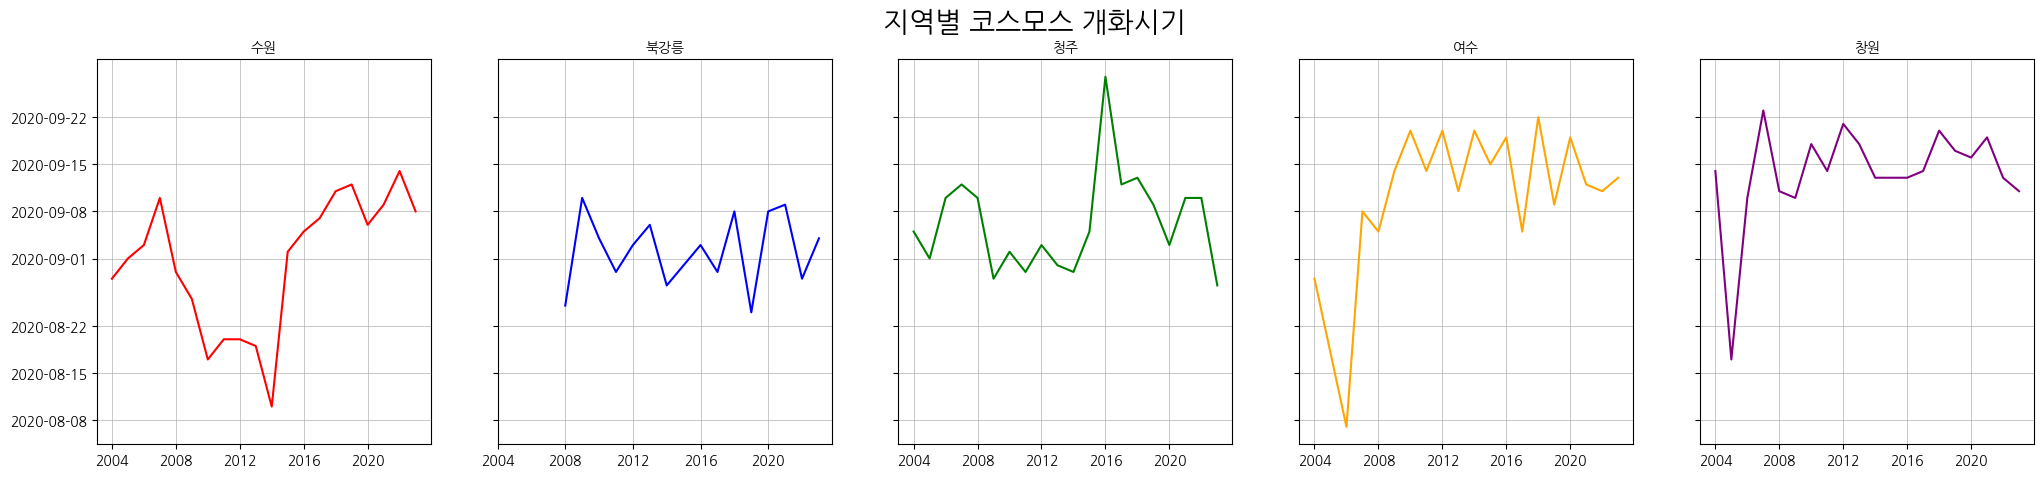

In [19]:
fig=plt.figure(figsize=(25,5))
ax=fig.subplots(1,5,sharey=True)
fig.suptitle('지역별 코스모스 개화시기',fontsize=20)
for i in range(5):
    plot_sub(cosmosDF,i,cosmosregion[i],'개화',color[i])
plt.show()

In [20]:
# 은행나무
before(yellowDF)

#결측치가 적은 단풍시작과 단풍 절정을 비교

(지점, Unnamed: 0_level_1)       0
(년도, Unnamed: 1_level_1)       0
단풍시작                         206
단풍시작(평비)                     249
단풍절정                         219
단풍절정(평비)                     260
단풍끝                         1041
단풍끝(평비)                     1041
낙옆시작                        1037
낙옆시작(평비)                    1041
낙옆끝                         1038
낙옆끝(평비)                     1041
dtype: int64


In [21]:
yellowDF.drop(['단풍끝','단풍끝(평비)','낙옆시작','낙옆시작(평비)','낙옆끝','낙옆끝(평비)'],axis=1,inplace=True)
before1(yellowDF,'단풍시작')

(지점, Unnamed: 0_level_1)
대구    20
안동    20
포항    20
광주    20
대전    20
      ..
고흥     4
장수     3
문경     3
의성     3
홍천     3
Name: count, Length: 74, dtype: int64


In [22]:
before1(yellowDF,'단풍절정')

(지점, Unnamed: 0_level_1)
대구    20
안동    20
포항    20
광주    20
대전    20
      ..
고흥     4
장수     3
문경     3
의성     3
홍천     3
Name: count, Length: 74, dtype: int64


In [23]:
yellowregion=['백령도','북강릉','대전','여수','포항']
yellowDF

,"(지점, Unnamed: 0_level_1)","(년도, Unnamed: 1_level_1)",단풍시작,단풍시작(평비),단풍절정,단풍절정(평비)
24,동해,2004,2004-10-20,-5일,2004-11-05,1일
25,동해,2005,2005-10-24,-1일,2005-10-29,-6일
26,동해,2006,2006-10-30,5일,2006-11-15,11일
27,동해,2007,2007-10-31,6일,2007-11-13,9일
28,동해,2008,2008-10-30,5일,2008-11-15,11일
...,...,...,...,...,...,...
1027,충주,2010,2010-10-21,2일,2010-10-28,1일
1028,충주,2011,2011-10-19,0일,2011-10-26,-1일
1029,충주,2012,2012-10-18,-1일,2012-10-25,-2일
1030,충주,2013,2013-10-20,1일,2013-10-29,2일


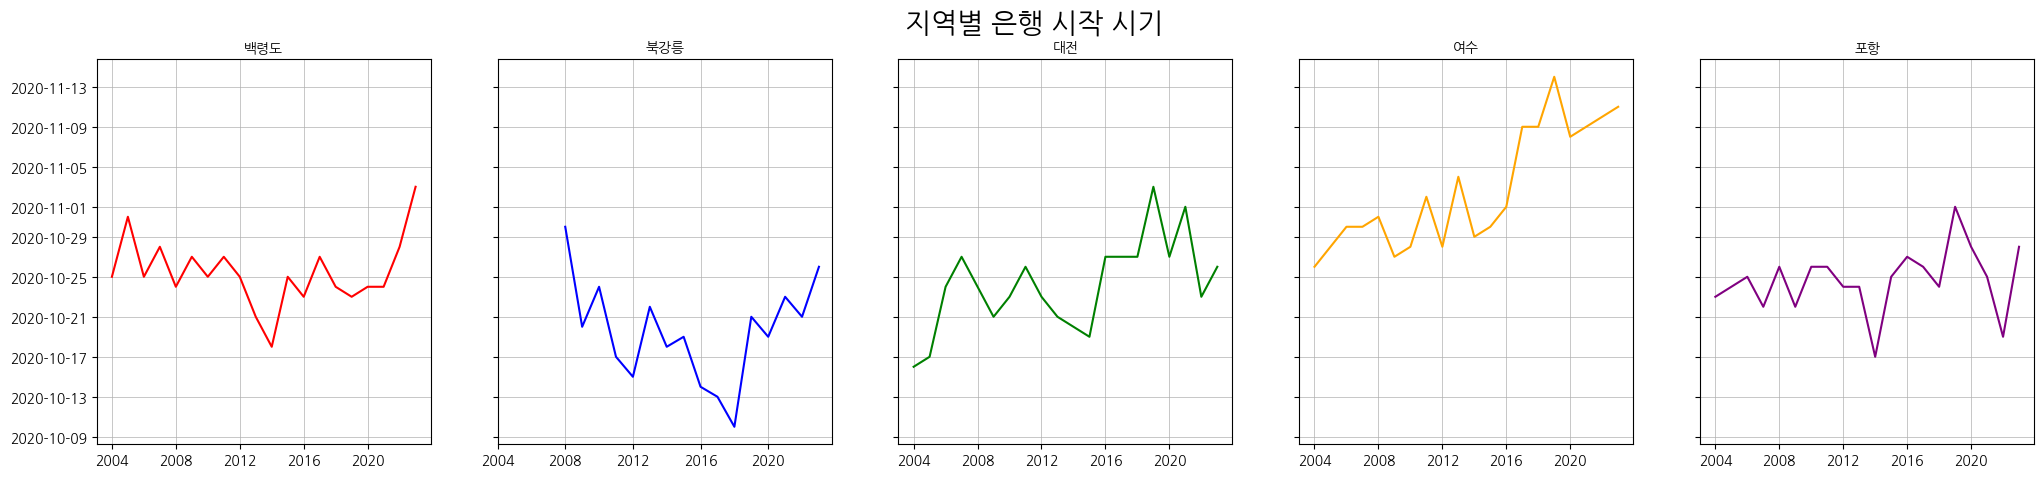

In [24]:
fig=plt.figure(figsize=(25,5))
ax=fig.subplots(1,5,sharey=True)
fig.suptitle('지역별 은행 시작 시기',fontsize=20)
for i in range(5):
    plot_sub(yellowDF,i,yellowregion[i],'단풍시작',color[i])
plt.show()

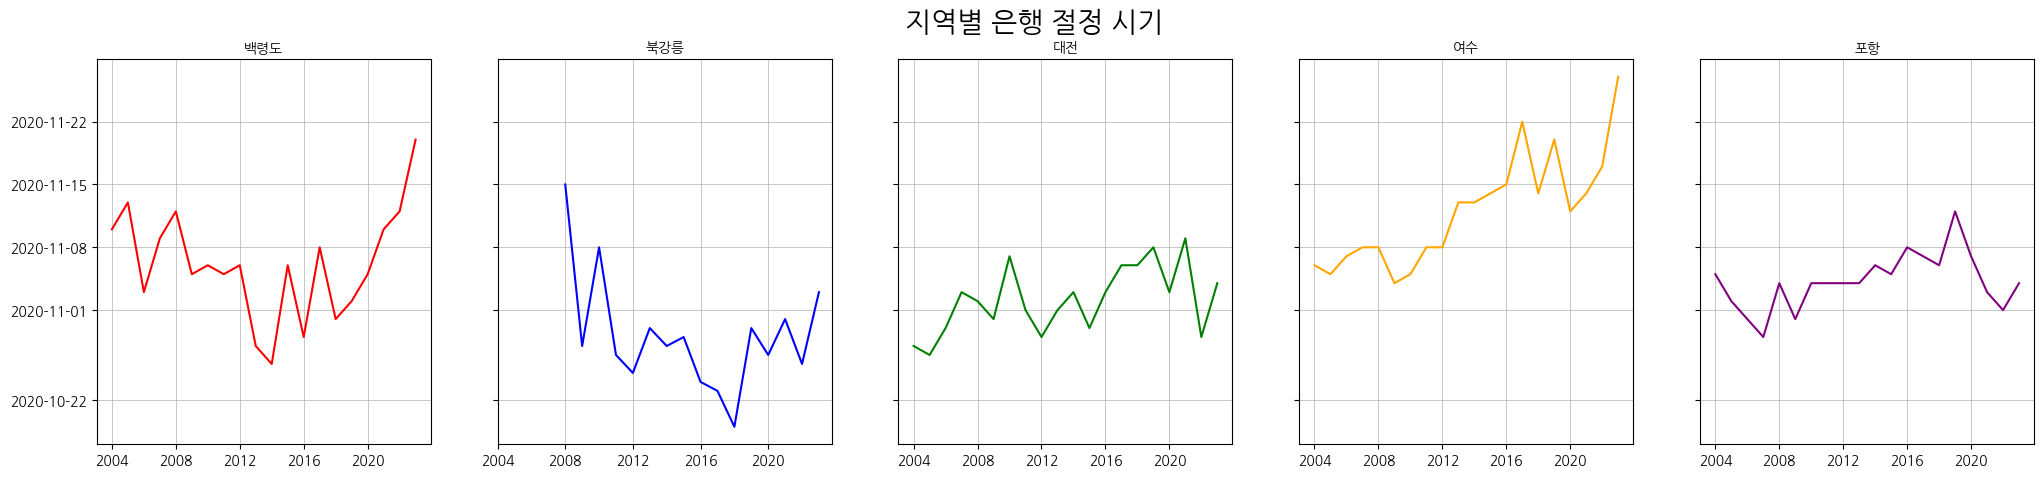

In [25]:
fig=plt.figure(figsize=(25,5))
ax=fig.subplots(1,5,sharey=True)
fig.suptitle('지역별 은행 절정 시기',fontsize=20)
for i in range(5):
    plot_sub(yellowDF,i,yellowregion[i],'단풍절정',color[i])

plt.show()

In [26]:
#단풍나무
before(redDF)

(지점, Unnamed: 0_level_1)       0
(년도, Unnamed: 1_level_1)       0
단풍시작                         196
단풍시작(평비)                     240
단풍절정                         212
단풍절정(평비)                     254
단풍끝                         1041
단풍끝(평비)                     1041
낙옆시작                        1038
낙옆시작(평비)                    1041
낙옆끝                         1039
낙옆끝(평비)                     1041
dtype: int64


In [27]:
redDF.drop(['단풍끝','단풍끝(평비)','낙옆시작','낙옆시작(평비)','낙옆끝','낙옆끝(평비)'],axis=1,inplace=True)
before1(redDF,'단풍시작')

(지점, Unnamed: 0_level_1)
대구    20
안동    20
포항    20
광주    20
대전    20
      ..
고흥     4
문경     3
장수     3
의성     3
홍천     3
Name: count, Length: 74, dtype: int64


In [28]:
before1(redDF,'단풍절정')

(지점, Unnamed: 0_level_1)
대구    20
안동    20
포항    20
광주    20
대전    20
      ..
고흥     4
문경     3
장수     3
의성     3
홍천     3
Name: count, Length: 74, dtype: int64


In [39]:
redregion=['백령도','북강릉','대전','여수','포항']

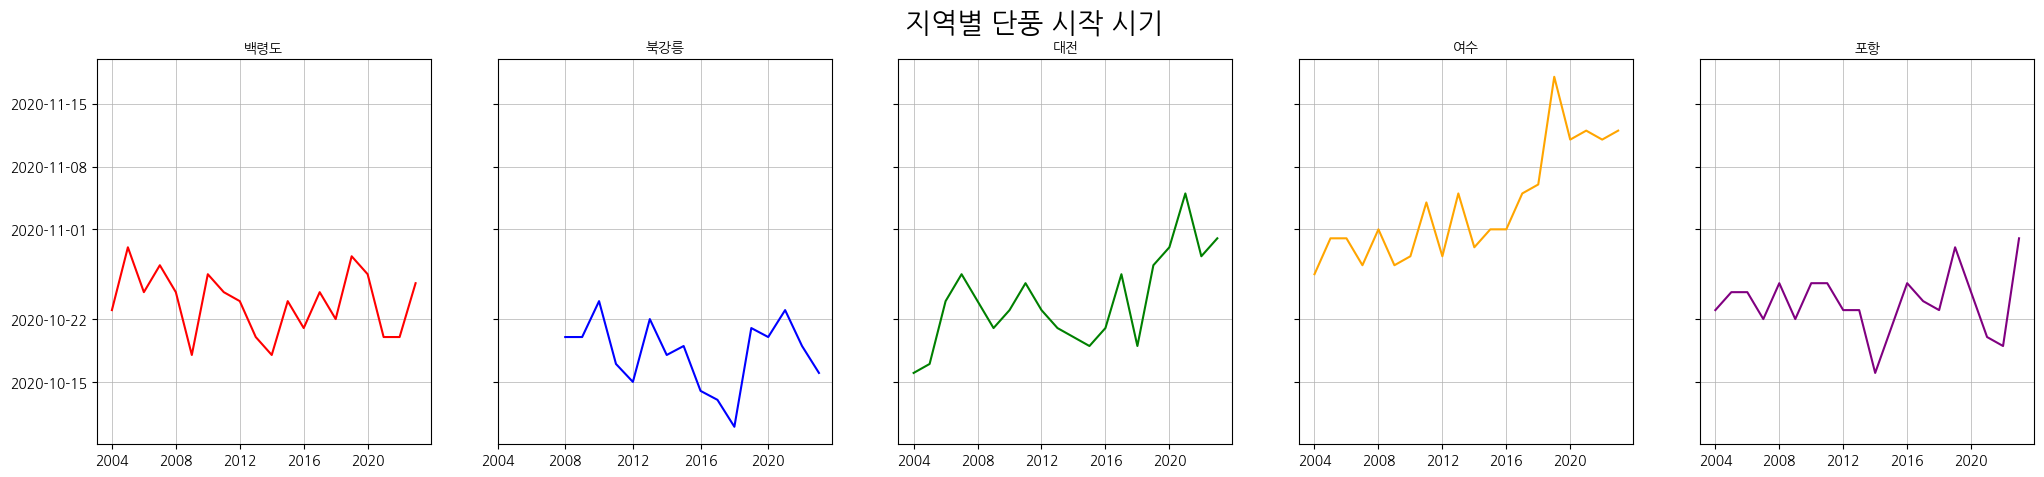

In [40]:
fig=plt.figure(figsize=(25,5))
ax=fig.subplots(1,5,sharey=True)
fig.suptitle('지역별 단풍 시작 시기',fontsize=20)
for i in range(5):
    plot_sub(redDF,i,redregion[i],'단풍시작',color[i])
plt.show()

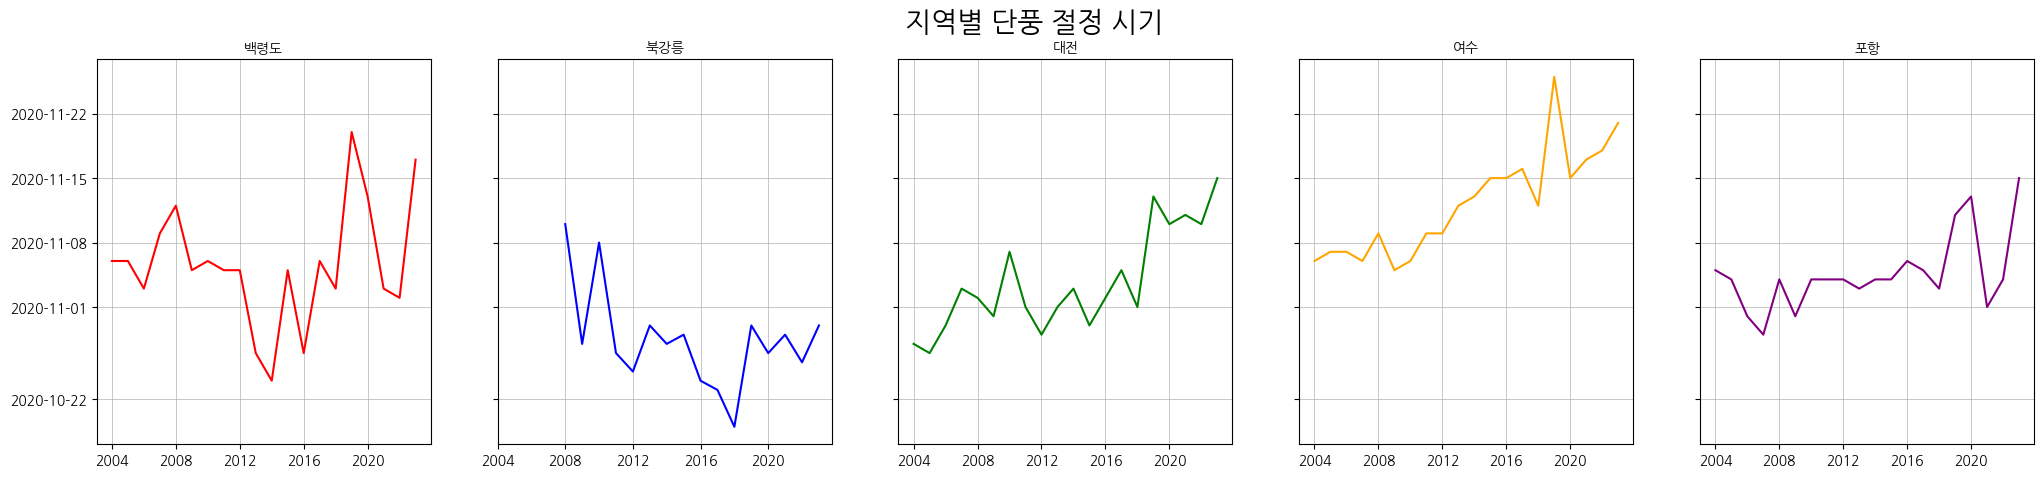

In [41]:
fig=plt.figure(figsize=(25,5))
ax=fig.subplots(1,5,sharey=True)
fig.suptitle('지역별 단풍 절정 시기',fontsize=20)
for i in range(5):
    plot_sub(redDF,i,redregion[i],'단풍절정',color[i])
plt.show()

In [32]:
# 유명산 단풍시기
before(famousDF)

(지점, Unnamed: 0_level_1)       0
(년도, Unnamed: 1_level_1)       0
시작                           573
시작(평비)                       594
끝                           1041
끝(평비)                       1041
절정                           572
절정(평비)                       596
dtype: int64


In [33]:
# 결측치 많은 컬럼 삭제
famousDF.drop(['끝','끝(평비)'],axis=1,inplace=True)

In [34]:
before1(famousDF,'시작')

(지점, Unnamed: 0_level_1)
대관령    20
안동     20
보은     20
제주     20
정읍     20
전주     20
남원     20
속초     20
대전     20
대구     20
광주     20
서울     20
충주     20
구미     20
합천     20
원주     20
해남     19
영주     18
울산     14
목포     12
영월     11
주암      7
봉화      5
태백      5
산청      5
금산      5
장흥      4
임실      4
장수      4
인제      4
부여      4
밀양      4
Name: count, dtype: int64


In [35]:
before1(famousDF,'절정')

(지점, Unnamed: 0_level_1)
대관령    20
안동     20
보은     20
제주     20
정읍     20
전주     20
남원     20
속초     20
대전     20
대구     20
광주     20
서울     20
충주     20
구미     20
합천     20
원주     20
해남     19
영주     18
울산     14
목포     12
영월     11
주암      7
봉화      5
태백      5
산청      5
금산      5
장흥      4
임실      4
장수      4
인제      4
부여      4
밀양      4
Name: count, dtype: int64


In [36]:
famousregion=['서울','속초','충주','광주','대구']

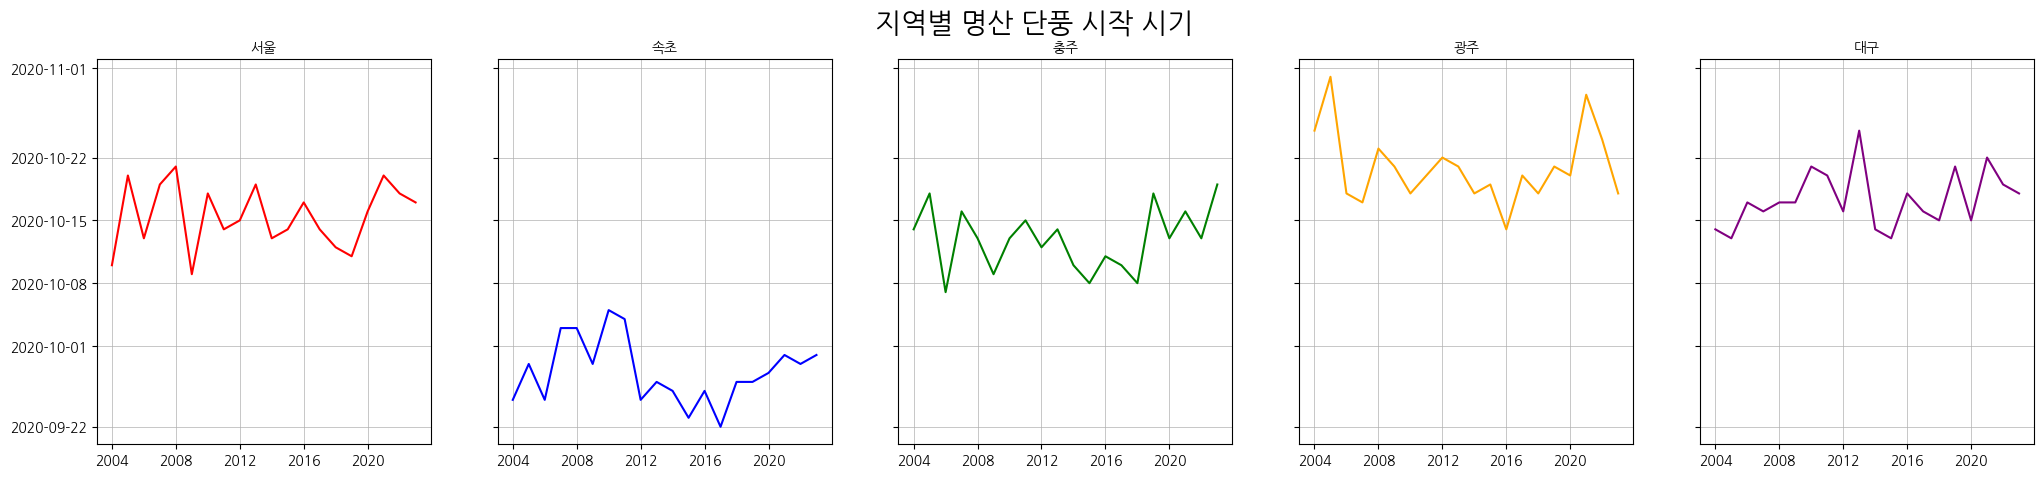

In [37]:
fig=plt.figure(figsize=(25,5))
ax=fig.subplots(1,5,sharey=True)
fig.suptitle('지역별 명산 단풍 시작 시기',fontsize=20)
for i in range(5):
    plot_sub(famousDF,i,famousregion[i],'시작',color[i])
plt.show()

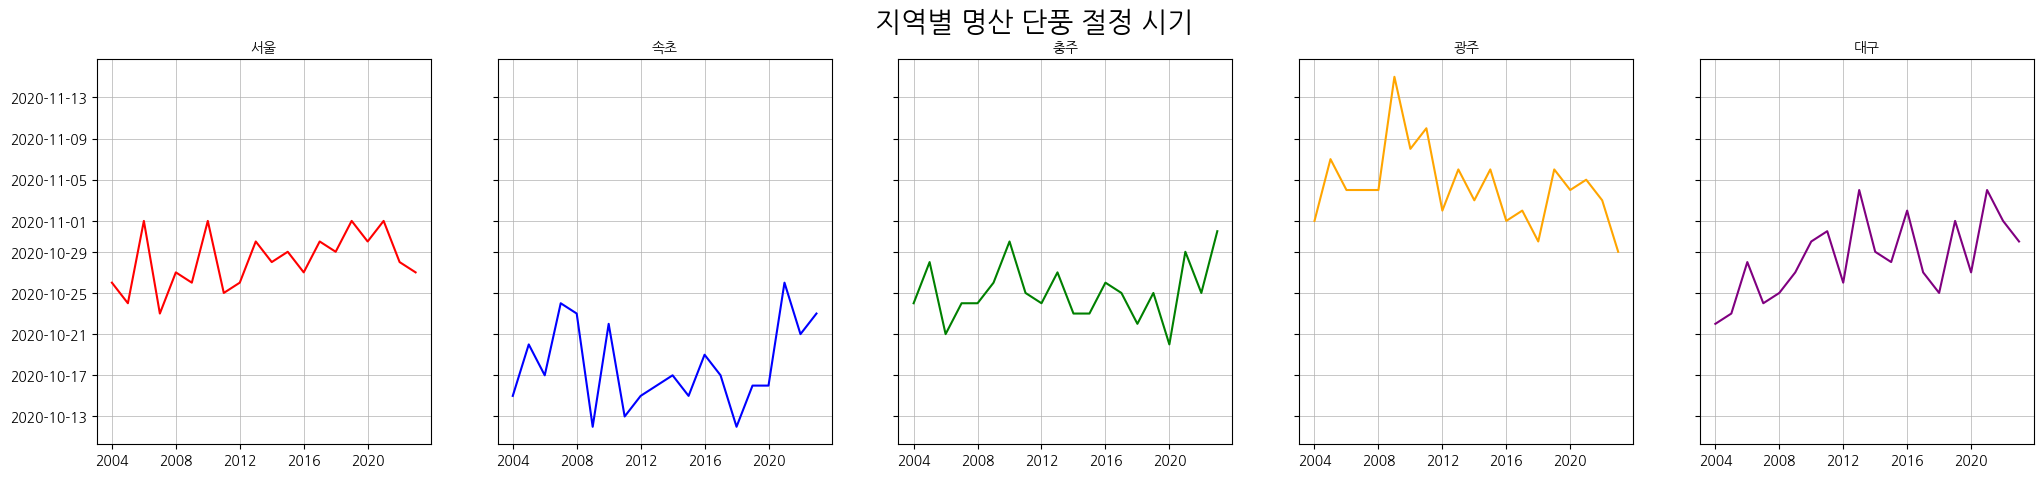

In [38]:
fig=plt.figure(figsize=(25,5))
ax=fig.subplots(1,5,sharey=True)
fig.suptitle('지역별 명산 단풍 절정 시기',fontsize=20)
for i in range(5):
    plot_sub(famousDF,i,famousregion[i],'절정',color[i])
plt.show()